# Débuguer avec Spyder

```{admonition} Objectifs
:class: hint
A l'issue de ce chapitre, vous serez capable de : 
- utiliser le mode debug de spyder pour localiser un bug dans un programme Python en exécutant le code ligne par ligne étape par étape.
- utiliser la fonctionnalité `step into function` dans le mode debug de Spyder pour localiser un bug dans une fonction.
```

Régulièrement, quand on ecrit un code, on se retrouve dans une situation où ça ne fonctionne pas. Le problème, c'est qu'il peut être difficile de trouver ou se trouve l'erreur quand le code est complexe et dispose de nombreuses fonctions. On appuie sur `run`, le programme se lance, et puis... rien. Aucun indice sur à quel endroit du code il y a eu un problème. Pas de message d'erreur. Heureusement, des outils existent pour traquer et identifier rapidement les bugs. Dans Spyder, nous allons voir le débugueur. 

```{admonition} Remarque
:class: note
Il existe une fonctionnalité analogue dans Jupyterlab. [Plus d'informations ici](https://jupyterlab.readthedocs.io/en/latest/user/debugger.html)
```
## Debug file

En ouvrant Spyder, vous pouvez voir dans les icones du haut un ensemble de plusieurs icones bleues.

![](https://github.com/yvesnoel/LU2ST031/blob/master/docs/assets/css/debug_icones.png?raw=true)


In [1]:
# -*- coding: utf-8 -*-
"""
Circulation thermohaline
"""

# définition de la fonction circuthermo
def circuthermo(S2, V2, C):
    """
    Fonction calculant le volume d'un océan et sa salinité après débacle d'un
    iceberg.
    
    Parameters
    ----------
    S2 : float
        volume de l'océan avant débacle.
    V2 : float
        salinité de l'océan avant débacle.
    C : float
        volume de l'iceberg.

    Returns
    -------
    V2_apres : float
        volume de l'océan avant débacle.
    V2_apres : float
        salinité de l'océan après débacle.

    """
    
    V2_apres = V2 + C # volume dans l'Atlantique Nord après décharge 
                        # d’un iceberg de 0.5 millions de km^3

    S2_apres = (S2 * V2) * V2_apres # salinité après décharge
     
    return V2_apres, S2_apres  # valeur renvoyée par la fonction

    # fin de la fonction et de l'indentation

S2 = 34.8 # salinité dans l’Atlantique Nord en psu
V2 = 70*10**6 # volume d'eau de l’Atlantique Nord en km
C = 0.5 # volume de l'iceberg

V2_apres, S2_apres = circuthermo(S2, V2, C)  # appel de la fonction circuthermo

print(S2_apres)  # print la valeur calculée

1.70520001218e+17


Il n'y a aucun message d'erreur, le script semble avoir fonctionné, mais... la salinité est beaucoup trop importante! Il faut localiser ou se trouve l'erreur.
Reprenons ce code dans spyder. Collez le code ci-dessus dans un nouveau fichier et ouvrez le dans spyder. Ensuite, cliquez sur le bouton `Debug file` ![](https://github.com/yvesnoel/LU2ST031/blob/master/docs/assets/css/debug_run.png?raw=true). Vous devriez voir une flèche bleue en ligne 2 comme ci-dessous:

![](https://github.com/yvesnoel/LU2ST031/blob/master/docs/assets/css/imprimecran_debug.png?raw=true)

Vous êtes maintenant dans le mode debug. Il s'agit d'un mode spécial dans lequel vous allez pouvoir exécuter votre code pas à pas pour identifier l'endroit ou se situe l'erreur. 

```{admonition} Remarque
:class: note
A tout moment, vous pouvez sortir de ce mode en cliquant sur `Stop debugging` !![](https://github.com/yvesnoel/LU2ST031/blob/master/docs/assets/css/debug_stop.png?raw=true)
```
Pour exécuter la ligne et uniquement celle-ci, cliquez sur `Run current line` !![](https://github.com/yvesnoel/LU2ST031/blob/master/docs/assets/css/debug_next.png?raw=true). Vous arrivez maintenant ligne 7. CLiquez encore une fois et Spyder va charger la fonction, puis passer à la ligne 39. 

Cliquez encore pour arriver ligne 40. Vous pouvez regarder l'état des variables au fur et à mesure en ouvrant l'onglet `Variable explorer`:

![](https://github.com/yvesnoel/LU2ST031/blob/master/docs/assets/css/imprimecran_debug40.png?raw=true)

Vous constatez que seul S2 a été chargé. Pour l'instant, tout va bien, le bug ne semble pas être ici. Continuons !![](https://github.com/yvesnoel/LU2ST031/blob/master/docs/assets/css/debug_next.png?raw=true)
 progressivement.  Regardez l'évolution des variables. Tout va bien jusqu'à la ligne 41. Il semble que ce soit au moment de l'appel de la fonction `circuthermo()` qu'il y ait un problème. Il faut rentrer directement dans la fonction avec les bons arguments pour trouver l'erreur.

## Rentrer dans les fonctions avec "step in"

Pour pouvoir rentrer "à l'intérieur" de la fonction pour la tester, vous devez être sur une ligne de code comportant un appel de la fonction. Si nécessaire, stoppez le mode debug, puis retourner dans le mode debug et revenez jusqu'à la ligne 43. A cet endroit, si vous cliquez sur !![](https://github.com/yvesnoel/LU2ST031/blob/master/docs/assets/css/debug_next.png?raw=true)
, vous exécutez simplement la ligne et passez à la suivante. Nous voulons savoir précisément ce qui se passe dans cette ligne en rentrant dans la fonction. Pour ce faire, cliquez sur `Step into function` !![](https://github.com/yvesnoel/LU2ST031/blob/master/docs/assets/css/debug_stepin.png?raw=true)
. Vous vous retrouvez maintenant dans la fonction `circuthermo()` et les variables `V2`, `S2` et `C` sont bien chargées comme indiqué dans le `Variable explorer`. Continuez a exécuter le code jusqu'à la ligne 33. Tout va bien. Exécutez cette ligne: `S2_apres` est calculé, et mal! C'est à cette ligne que se trouve le problème. En effet, il est nécessaire de remplacer

In [3]:
    S2_apres = (S2 * V2) * V2_apres # salinité après décharge

par

In [5]:
    S2_apres = (S2 * V2) / V2_apres # salinité après décharge

## 🚀 Pour aller plus loin: les breakpoints

Parfois, on peut avoir une intuition sur la localisation du problème. Si le problème n'est certainement pas dans la première partie d'un code par exemple, il peut être laborieux de cliquez 50 fois sur ![](https://github.com/yvesnoel/LU2ST031/blob/master/docs/assets/css/debug_next.png?raw=true)
. Dans ce cas, on peut établir des points de passage dans notre code et passer uniquement par ces points. A gauche du script, vous pouvez voir les numéros des différentes lignes. En passant la souris à droite des numéros, vous pouvez apercevoir un rond rouge. Cliquez:

![](https://github.com/yvesnoel/LU2ST031/blob/master/docs/assets/css/imprimecran_breakpoint.png?raw=true)


Vous avez défini un "breakpoint", un point de d'arret, sur la ligne indiquée. Retournez dans le mode debug. Vous arrivez directement à la ligne du breakpoint!

```{admonition} Remarque
:class: note
Vous pouvez indiquer autant de points de d'arret que vous le souhaitez, aller au premier puis ensuite passer en ligne par ligne. Si vous indiquez plusieurs points de passage et que vous souhaitez aller au suivant, il suffit de cliquer sur `Continue execution until next breakpoint` 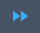.
```